# <p style="text-align:center;color:#0000FF;background-color:#00FFFF;font-size:30px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">CRITICAL TEMPERATURE OF SUPERCONDUCTORS (Tc) </p>

# Introduction
<iframe src="https://gifer.com/embed/BIKL" width=480 height=270.049 frameBorder="0" allowFullScreen></iframe><p><a href="https://gifer.com">via GIFER</a></p>

A superconductor is a substance that conducts electricity without resistance when it becomes colder than a "critical temperature. 

AIM of this work is do an Expolatory Data Analysis on the given data and:
* 1. Find the factors that affects Tc.
* 2. Visualizing the given data.
* 3. Develop and compare Various machine learning models for predicting Tc.

# Table of Contents
* [Import Libraries , Dataset & Basic Operations](#section-1)
* [Finding Relevant Features](#section-2)
* [Visualization](#section-3)
* [Model Training](#section-4)
    - [Linear Regression](#section-4.1)
    - [Linear Regression with Scaling](#section-4.2)
    - [Polynomial Regression](#section-4.3)
    - [Ridge Regression](#section-4.4)
    - [Lasso Regression](#section-4.5)
    - [ElasticNet](#section-4.6)
    - [Comparision of Different Regression Models](#section-4.7)
    - [Decision Tree Regressor](#section-4.8)
    - [Random Forest Regressor](#section-4.9)
    - [Hyperparameter Tuning](#section-4.10)
* [Final Model & Conclusions](#section-5)
    - [Conclusion & Future Scope](#section-5.1)
   

<a id="section-1"></a>
# 1. Import Libraries , Dataset & Basic operations

In [337]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [338]:
# Load the dataset

train_df = pd.read_csv("C:/Users/Praveen/Desktop/SuperTc/dataset/train.csv")

formula_train_df = pd.read_csv("C:/Users/Praveen/Desktop/SuperTc/dataset/formula_train.csv")

In [339]:
# dataset1 
train_df.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

In [340]:
# dataset 2
formula_train_df.head()

H  He   Li   Be    B    C    N    O    F  Ne  ...   Au   Hg   Tl   Pb  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
1  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
2  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
3  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
4  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   

    Bi  Po  At  Rn  critical_temp                material  
0  0.0   0   0   0           29.0         Ba0.2La1.8Cu1O4  
1  0.0   0   0   0           26.0  Ba0.1La1.9Ag0.1Cu0.9O4  
2  0.0   0   0   0           19.0         Ba0.1La1.9Cu1O4  
3  0.0   0   0   0           22.0       Ba0.15La1.85Cu1O4  
4  0.0   0   0   0           23.0         Ba0.3La1.7Cu1O4  

[5 rows x 88 columns]

In [341]:
# dataset 2
formula_train_df.describe()

H       He            Li            Be             B  \
count  21263.000000  21263.0  21263.000000  21263.000000  21263.000000   
mean       0.017685      0.0      0.012125      0.034638      0.142594   
std        0.267220      0.0      0.129552      0.848541      1.044486   
min        0.000000      0.0      0.000000      0.000000      0.000000   
25%        0.000000      0.0      0.000000      0.000000      0.000000   
50%        0.000000      0.0      0.000000      0.000000      0.000000   
75%        0.000000      0.0      0.000000      0.000000      0.000000   
max       14.000000      0.0      3.000000     40.000000    105.000000   

                  C             N             O             F       Ne  ...  \
count  21263.000000  21263.000000  21263.000000  21263.000000  21263.0  ...   
mean       0.384968      0.013284      3.009129      0.014874      0.0  ...   
std        4.408032      0.150427      3.811649      0.132119      0.0  ...   
min        0.000000      0.000000      0.000000      0.000000      0.0  ...   
25%        0.000000      0.000000      0.000000      0.000000      0.0  ...   
50%        0.000000      0.000000      1.000000      0.000000      0.0  ...   
75%        0.000000      0.000000      6.800000      0.000000      0.0  ...   
max      120.000000     12.800000     66.000000      4.000000      0.0  ...   

                 Pt            Au            Hg            Tl            Pb  \
count  21263.000000  21263.000000  21263.000000  21263.000000  21263.000000   
mean       0.034108      0.020535      0.036663      0.047954      0.042461   
std        0.307888      0.717975      0.205846      0.272298      0.274365   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        5.800000     64.000000      8.000000      7.000000     19.000000   

                 Bi       Po       At       Rn  critical_temp  
count  21263.000000  21263.0  21263.0  21263.0   21263.000000  
mean       0.201009      0.0      0.0      0.0      34.421219  
std        0.655927      0.0      0.0      0.0      34.254362  
min        0.000000      0.0      0.0      0.0       0.000210  
25%        0.000000      0.0      0.0      0.0       5.365000  
50%        0.000000      0.0      0.0      0.0      20.000000  
75%        0.000000      0.0      0.0      0.0      63.000000  
max       14.000000      0.0      0.0      0.0     185.000000  

[8 rows x 87 columns]

In [342]:
# Calculate the sum of each column
column_sums = formula_train_df.sum()

# Find columns where the sum equals zero
zero_sum_columns = column_sums[column_sums == 0]

# Display the columns with zero sum
print("Columns with total count = 0:")
print(zero_sum_columns)


Columns with total count = 0:
He    0
Ne    0
Ar    0
Kr    0
Xe    0
Pm    0
Po    0
At    0
Rn    0
dtype: object


In [343]:
# List of columns to drop
columns_to_drop = ['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Pm', 'Po', 'At', 'Rn'] #dropping inert gases which doesnt have any values

# Drop specified columns
formula_train_df.drop(columns=columns_to_drop, inplace=True)

# Display the modified DataFrame
formula_train_df.head()

H   Li   Be    B    C    N    O    F   Na   Mg  ...   Os   Ir   Pt   Au  \
0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    Hg   Tl   Pb   Bi  critical_temp                material  
0  0.0  0.0  0.0  0.0           29.0         Ba0.2La1.8Cu1O4  
1  0.0  0.0  0.0  0.0           26.0  Ba0.1La1.9Ag0.1Cu0.9O4  
2  0.0  0.0  0.0  0.0           19.0         Ba0.1La1.9Cu1O4  
3  0.0  0.0  0.0  0.0           22.0       Ba0.15La1.85Cu1O4  
4  0.0  0.0  0.0  0.0           23.0         Ba0.3La1.7Cu1O4  

[5 rows x 79 columns]

In [344]:
print("Dataset1 shape:", train_df.shape)
print("Dataset1 size:", train_df.size)

print("\n===================================\n")

print("Dataset2 shape:", formula_train_df.shape)
print("Dataset2 size:", formula_train_df.size)


Dataset1 shape: (21263, 82)
Dataset1 size: 1743566


Dataset2 shape: (21263, 79)
Dataset2 size: 1679777


BOTH THE DATASET HAS EQUAL NUMBER OF ROWS, BUT DIFFERENT NUMBER OF COLUMNS


In [345]:
# Counting the number of duplicates
num_duplicates = train_df.duplicated().sum()
print("Number of duplicates rows in dataset 1:   ", num_duplicates)


num_duplicates1 = formula_train_df.duplicated().sum()
print("Number of duplicates rows in dataset 2:    ", num_duplicates1)

Number of duplicates rows in dataset 1:    66
Number of duplicates rows in dataset 2:     0


In [346]:
# Dropping duplicate rows in train_df
train_df_cleaned = train_df.drop_duplicates()

# Finding the indices of the duplicate rows in train_df
duplicate_indices = train_df[train_df.duplicated()].index

# Dropping corresponding rows in formula_train_df
formula_train_df_cleaned = formula_train_df.drop(duplicate_indices)


In [347]:
print("Dataset1 shape : ", train_df_cleaned.shape)
print("Dataset1 size : ", train_df_cleaned.size)

print("\n===================================\n")

print("Dataset2 shape : ", formula_train_df_cleaned.shape)
print("Dataset2 shape : ", formula_train_df_cleaned.size)

Dataset1 shape :  (21197, 82)
Dataset1 size :  1738154


Dataset2 shape :  (21197, 79)
Dataset2 shape :  1674563


In [348]:
# Merging the two DataFrames based on their indices
merged_df = pd.merge(train_df_cleaned, formula_train_df_cleaned, left_index=True, right_index=True)

merged_df.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...   Os   Ir   Pt   Au   Hg   Tl   Pb   Bi  \
0        51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1        47.094633  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2        51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3        51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4        51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   critical_temp_y                material  
0             29.0         Ba0.2La1.8Cu1O4  
1             26.0  Ba0.1La1.9Ag0.1Cu0.9O4  
2             19.0         Ba0.1La1.9Cu1O4  
3             22.0       Ba0.15La1.85Cu1O4  
4             23.0         Ba0.3La1.7Cu1O4  

[5 rows x 161 columns]

In [349]:
# Displaying the shape and size of the merged DataFrame
print("Merged DataFrame shape:", merged_df.shape)
print("Merged DataFrame size:", merged_df.size)

Merged DataFrame shape: (21197, 161)
Merged DataFrame size: 3412717


In [350]:
column_headings = merged_df.columns.tolist()
print(column_headings)

['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffini

In [351]:
# Drop the column 'critical_temp_x'
merged_df.drop(columns=['critical_temp_x'], inplace=True)

# Rename 'critical_temp_y' to 'critical_temp'
merged_df.rename(columns={'critical_temp_y': 'critical_temp'}, inplace=True)

# Display the modified DataFrame
column_headings = merged_df.columns.tolist()
print(column_headings)

['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffini

In [352]:
missing_values_critical_temp = merged_df['critical_temp'].isnull().sum()
print("Number of missing values in the 'critical_temp' column:", missing_values_critical_temp)

Number of missing values in the 'critical_temp' column: 0


NO MISSING VALUES 

In [353]:
# COUNTING THE DUPLICATE ROWS
duplicate_count = merged_df.duplicated().sum()

print("Number of duplicate rows in dataset1:", duplicate_count)


Number of duplicate rows in dataset1: 0


In [354]:
# Create a new DataFrame with selective columns
supercon_df = merged_df[['number_of_elements', 'critical_temp', 'material']]

# Display the new DataFrame
supercon_df

number_of_elements  critical_temp                material
0                       4          29.00         Ba0.2La1.8Cu1O4
1                       5          26.00  Ba0.1La1.9Ag0.1Cu0.9O4
2                       4          19.00         Ba0.1La1.9Cu1O4
3                       4          22.00       Ba0.15La1.85Cu1O4
4                       4          23.00         Ba0.3La1.7Cu1O4
...                   ...            ...                     ...
21258                   4           2.44      Tm0.84Lu0.16Fe3Si5
21259                   5         122.10         Tl1Ba2Ca3Cu4O11
21260                   2           1.98              Nb0.8Pd0.2
21261                   2           1.84            Nb0.69Pd0.31
21262                   3          12.80           Fe1Se0.2Te0.8

[21197 rows x 3 columns]

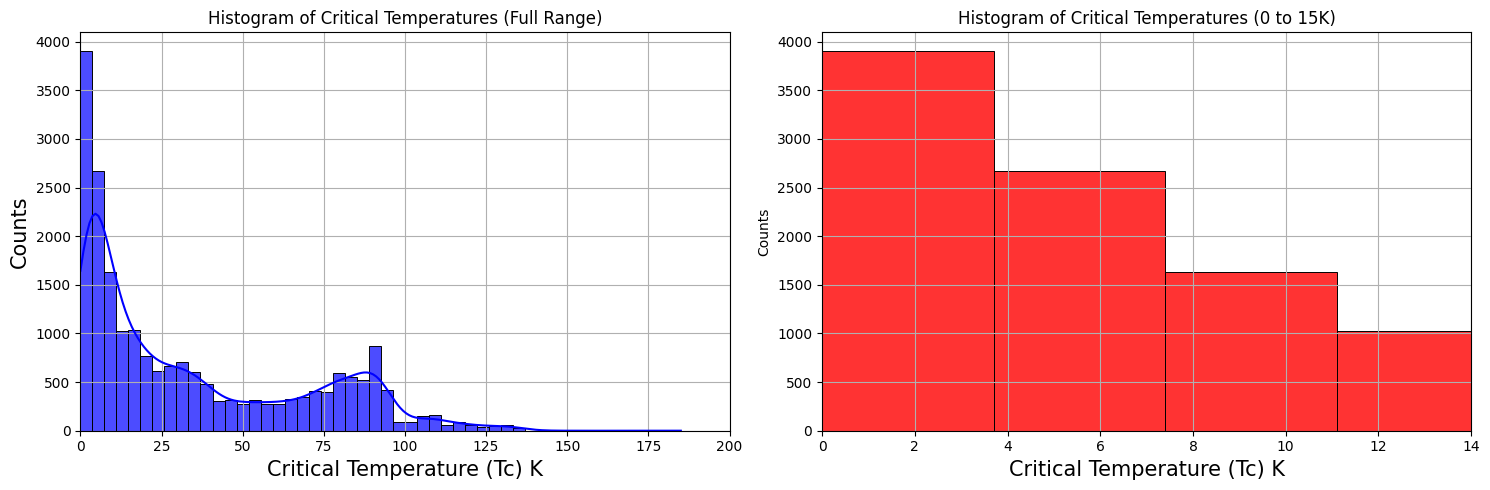

In [355]:
# PLOTTING TEMPERATURE DISTRIBUTION

# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(supercon_df['critical_temp'], kde=True, color='blue', bins=50, alpha=0.7, ax=axs[0])
axs[0].set_xlabel('Critical Temperature (Tc) K', size=15)
axs[0].set_ylabel('Counts',size=15)
axs[0].set_title('Histogram of Critical Temperatures (Full Range)')
axs[0].grid(True)
axs[0].set_xlim(0, 200)

# Plotting temperature distribution for the entire range
sns.histplot(supercon_df['critical_temp'], color='r', bins=50, alpha=0.8, ax=axs[1])
axs[1].set_xlabel('Critical Temperature (Tc) K', size=15)
axs[1].set_ylabel('Counts')
axs[1].set_title('Histogram of Critical Temperatures (0 to 15K)')
axs[1].grid(True)
axs[1].set_xlim(0, 14)


plt.tight_layout()
plt.show()

VALUES ARE TOO SKEWED TOWARDS THE LEFT , HENCE A SUBPLOT OF THE LOWER TEMPERATURE BELOW 15K IS PLOTTED SEPERATELY

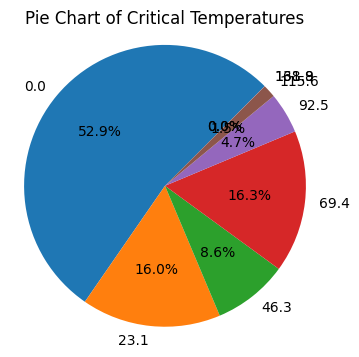

In [356]:
# Calculate frequencies for each bin
counts, bins = np.histogram(supercon_df['critical_temp'], bins=8)

# Round off the temperature values and start with 0
labels_rounded = [round(bin_val, 1) for bin_val in bins[:-1]]

# Plotting the pie chart with rounded temperature values starting from 0
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels_rounded, autopct='%1.1f%%', startangle=45)
plt.title('Pie Chart of Critical Temperatures')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [357]:
l0 = len (supercon_df[ (supercon_df['critical_temp'] >= 0) & (supercon_df['critical_temp'] <= 49)])
print ('Number of samples with Tc in range 0 K- 49 K      :   {}'.format(l0))


l1 = len (supercon_df[ (supercon_df['critical_temp'] >= 50) & (supercon_df['critical_temp'] <= 100)])
print ('Number of samples with Tc in range 50 K- 100 K    :   {}'.format(l1))


l2 = len (supercon_df[ (supercon_df['critical_temp'] >= 101) & (supercon_df['critical_temp'] <= 140)])
print ('Number of samples with Tc in range 101 K- 140 K   :   {}'.format(l2))


l3 = len (supercon_df[ (supercon_df['critical_temp'] >= 140) & (supercon_df['critical_temp'] <= 150)])
print ('Number of samples with Tc in range 141 K- 150 K   :   {}'.format(l3))

l4 = len (supercon_df[ (supercon_df['critical_temp'] >= 151)])

print ('Number of samples with Tc greater than 150K       :   {}'.format(l4))

Number of samples with Tc in range 0 K- 49 K      :   14790
Number of samples with Tc in range 50 K- 100 K    :   5610
Number of samples with Tc in range 101 K- 140 K   :   760
Number of samples with Tc in range 141 K- 150 K   :   2
Number of samples with Tc greater than 150K       :   1


# Inference from distributions
From the above distribution Plot we can infer:
* A majority of the samples in our data set has very low Tc (14855 samples to be precise).
* 5611 samples have Tc between 50K - 100K .
* 760 samples have Tc between 101K - 140 K.
* 2 samples have Tc between 141K - 150K.
* only 1 sample has Tc greater than 150K.

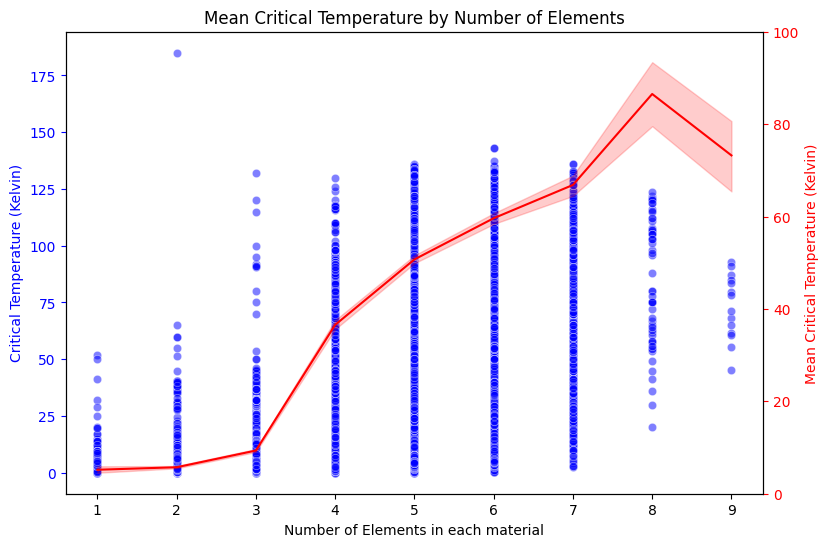

In [358]:

# Create figure and first y-axis
fig, ax1 = plt.subplots(figsize=(9, 6))

# Scatter points on the first y-axis
sns.scatterplot(x='number_of_elements', y='critical_temp', data=supercon_df, color='blue', alpha=0.5, ax=ax1)
ax1.set_ylabel('Critical Temperature (Kelvin)', color='blue')
ax1.tick_params(axis='y', colors='blue')
# Create second y-axis
ax2 = ax1.twinx()

# Line plot on the second y-axis
sns.lineplot(x='number_of_elements', y='critical_temp', data=supercon_df, color='red', ax=ax2)
ax2.set_ylabel('Mean Critical Temperature (Kelvin)', color='red')

# Set scale for the right y-axis
ax2.set_ylim(0, 100)

# Set color of tick labels on the right y-axis to red
ax2.tick_params(axis='y', colors='red')

# Set title and x-axis label
ax1.set_title('Mean Critical Temperature by Number of Elements')
ax1.set_xlabel('Number of Elements in each material')

plt.show()


An OUTLIER SEEM TO BE PRESENT ABOVE 175 K

In [359]:
# Filter the DataFrame to exclude rows with 'critical_temp' greater than the threshold
supercon_df = supercon_df[supercon_df['critical_temp'] <= 160]

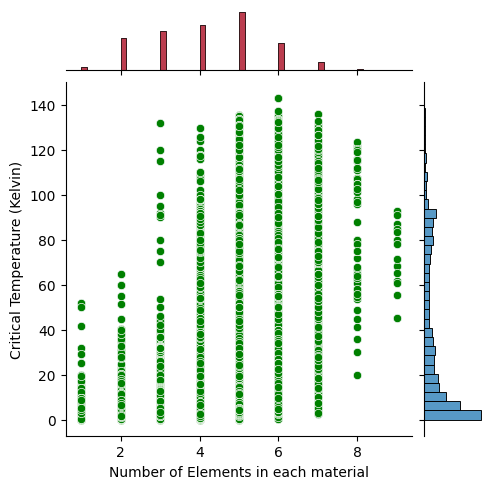

In [360]:
# Create the joint plot without specifying kind='scatter'
joint = sns.jointplot(x='number_of_elements', y='critical_temp', data=supercon_df, height=5)

# Customize the scatter plot to set the color of scatter points
joint.plot_joint(sns.scatterplot, color='green')
sns.histplot(supercon_df['number_of_elements'], ax=joint.ax_marg_x, color="red", alpha=0.6)
# Set labels
plt.xlabel('Number of Elements in each material')
plt.ylabel('Critical Temperature (Kelvin)')

# Show the plot
plt.show()

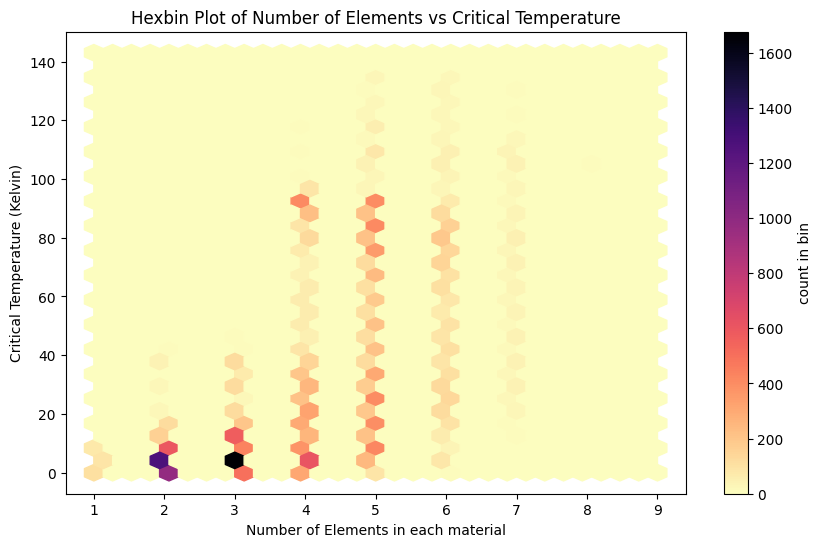

In [361]:
plt.figure(figsize=(10, 6))
plt.hexbin(supercon_df['number_of_elements'], supercon_df['critical_temp'], gridsize=30, cmap='magma_r')  # Change the cmap to 'viridis'
plt.colorbar(label='count in bin')
plt.title('Hexbin Plot of Number of Elements vs Critical Temperature')
plt.xlabel('Number of Elements in each material')
plt.ylabel('Critical Temperature (Kelvin)')
plt.show()

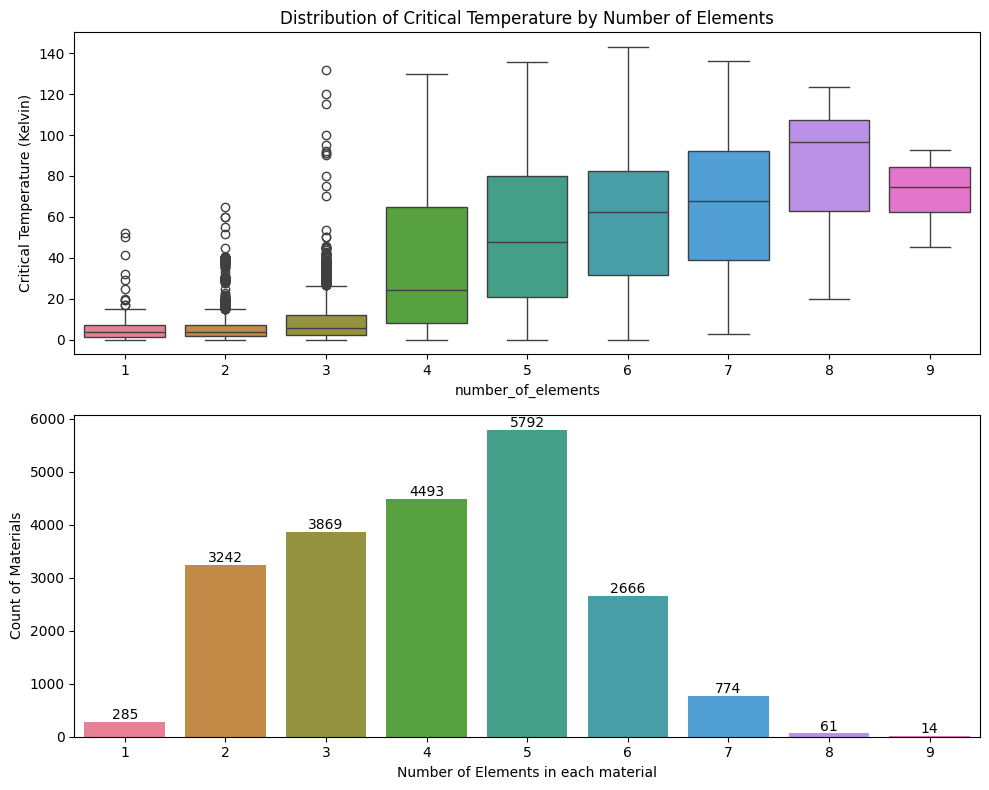

In [362]:
# Define a color palette (you can use any color palette of your choice)
custom_palette = sns.color_palette("husl", supercon_df['number_of_elements'].nunique())

# Create the box plot with the custom palette
plt.figure(figsize=(10, 8))

# Subplot 1: Box Plot
plt.subplot(2, 1, 1)
sns.boxplot(x='number_of_elements', y='critical_temp', data=supercon_df, palette=custom_palette)
plt.title('Distribution of Critical Temperature by Number of Elements')
plt.ylabel('Critical Temperature (Kelvin)')

# Subplot 2: Count Plot
plt.subplot(2, 1, 2)
colors = sns.color_palette("husl", len(supercon_df['number_of_elements'].unique()))
ax = sns.countplot(x='number_of_elements', data=supercon_df, palette=colors)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.xlabel('Number of Elements in each material')
plt.ylabel('Count of Materials')

plt.tight_layout()
plt.show()


In [364]:
import re


def split_chemical_composition(chemical_composition):
    """
    Function to split a chemical composition string into individual elements.
    """
    # Define a regex pattern to match elements (uppercase letter followed by optional lowercase letters)
    pattern = r'[A-Z][a-z]*'
    # Use findall to extract all matches of the pattern from the input string
    elements = re.findall(pattern, chemical_composition)
    return elements

# Apply the split_chemical_composition function to the 'material' column
formula_train_df_cleaned['Chemical_composition'] = formula_train_df_cleaned['material'].apply(split_chemical_composition)

# Display the DataFrame with the split elements
formula_train_df_cleaned.head(100)

H   Li   Be    B    C    N    O    F   Na   Mg  ...   Ir   Pt   Au   Hg  \
0   0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2   0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3   0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95  0.0  0.0  0.0  0.0  0.0  0.0  7.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
96  0.0  0.0  0.0  0.0  0.0  0.0  8.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
97  0.0  0.0  0.0  0.0  0.0  0.0  8.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
98  0.0  0.0  0.0  0.0  0.0  0.0  7.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
99  0.0  0.0  0.0  0.0  0.0  0.0  7.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

     Tl   Pb   Bi  critical_temp                material  Chemical_composition  
0   0.0  0.0  0.0           29.0         Ba0.2La1.8Cu1O4       [Ba, La, Cu, O]  
1   0.0  0.0  0.0           26.0  Ba0.1La1.9Ag0.1Cu0.9O4   [Ba, La, Ag, Cu, O]  
2   0.0  0.0  0.0           19.0         Ba0.1La1.9Cu1O4       [Ba, La, Cu, O]  
3   0.0  0.0  0.0           22.0       Ba0.15La1.85Cu1O4       [Ba, La, Cu, O]  
4   0.0  0.0  0.0           23.0         Ba0.3La1.7Cu1O4       [Ba, La, Cu, O]  
..  ...  ...  ...            ...                     ...                   ...  
95  0.0  0.0  0.0           89.9              Y1Ba2Cu3O7        [Y, Ba, Cu, O]  
96  0.0  0.0  0.0           85.0             Ho1Ba2Cu3O8       [Ho, Ba, Cu, O]  
97  0.0  0.0  0.0           90.5       Y0.1Gd0.9Ba2Cu3O8    [Y, Gd, Ba, Cu, O]  
98  0.0  0.0  0.0          130.0              Y1Ba2Cu3O7        [Y, Ba, Cu, O]  
99  0.0  0.0  0.0           88.8              Y1Ba2Cu3O7        [Y, Ba, Cu, O]  

[100 rows x 80 columns]

In [367]:
# Splitting the list into separate columns
elements_df = formula_train_df_cleaned['Chemical_composition'].apply(pd.Series)

# Renaming the columns to first_element, second_element, and so on
elements_df.columns = [f'{i+1}_element' for i in range(elements_df.shape[1])]

# Concatenating the new DataFrame with the original one
formula_train_df= pd.concat([formula_train_df_cleaned, elements_df], axis=1)


# Displaying the updated DataFrame
formula_train_df.head()

H   Li   Be    B    C    N    O    F   Na   Mg  ...  \
0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...   
1  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...   
2  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...   
3  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...   
4  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...   

   Chemical_composition  1_element  2_element  3_element  4_element  \
0       [Ba, La, Cu, O]         Ba         La         Cu          O   
1   [Ba, La, Ag, Cu, O]         Ba         La         Ag         Cu   
2       [Ba, La, Cu, O]         Ba         La         Cu          O   
3       [Ba, La, Cu, O]         Ba         La         Cu          O   
4       [Ba, La, Cu, O]         Ba         La         Cu          O   

   5_element  6_element  7_element  8_element  9_element  
0        NaN        NaN        NaN        NaN        NaN  
1          O        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN        NaN  

[5 rows x 89 columns]

In [368]:
formula_train_df.iloc[:,-9 : -1]

1_element 2_element 3_element 4_element 5_element 6_element 7_element  \
0            Ba        La        Cu         O       NaN       NaN       NaN   
1            Ba        La        Ag        Cu         O       NaN       NaN   
2            Ba        La        Cu         O       NaN       NaN       NaN   
3            Ba        La        Cu         O       NaN       NaN       NaN   
4            Ba        La        Cu         O       NaN       NaN       NaN   
...         ...       ...       ...       ...       ...       ...       ...   
21258        Tm        Lu        Fe        Si       NaN       NaN       NaN   
21259        Tl        Ba        Ca        Cu         O       NaN       NaN   
21260        Nb        Pd       NaN       NaN       NaN       NaN       NaN   
21261        Nb        Pd       NaN       NaN       NaN       NaN       NaN   
21262        Fe        Se        Te       NaN       NaN       NaN       NaN   

      8_element  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
21258       NaN  
21259       NaN  
21260       NaN  
21261       NaN  
21262       NaN  

[21197 rows x 8 columns]

In [370]:
# Dictionary to store the sum of unique entries for each column
sum_unique_entries = {}

# Iterate over each column from element_1 to element_9
for i in range(1, 10):
    column_name = f"{i}_element"
    unique_entries = formula_train_df[column_name].dropna().unique()
    sum_unique_entries[column_name] = len(unique_entries)

# Convert the dictionary to a DataFrame for better visualization
sum_unique_entries_df = pd.DataFrame(sum_unique_entries, index=[0])

print("Sum of unique entries in each column:")
sum_unique_entries_df

Sum of unique entries in each column:


1_element  2_element  3_element  4_element  5_element  6_element  \
0         75         77         76         73         56         38   

   7_element  8_element  9_element  
0         10          3          1

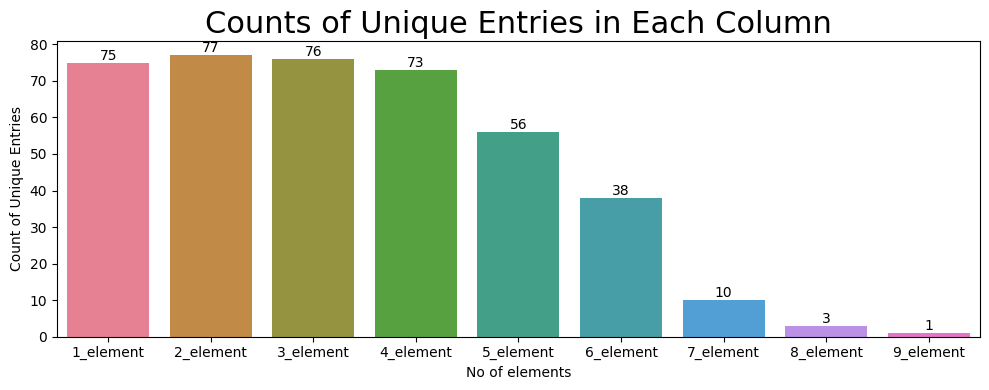

In [379]:
plt.figure(figsize=(10, 4))

# Using seaborn color palette for visualization
colors = sns.color_palette("husl", len(sum_unique_entries_df.columns))

# Plotting the count of unique entries using seaborn countplot
ax = sns.barplot(x=sum_unique_entries_df.columns, y=sum_unique_entries_df.iloc[0], palette=colors)

# Adding annotations to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),(p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',xytext=(0, 5),textcoords='offset points')

# Setting labels and title
plt.xlabel('No of elements')
plt.ylabel('Count of Unique Entries')
plt.title('Counts of Unique Entries in Each Column', size =22)
plt.tight_layout()
plt.show()


In [378]:
# Initialize a counter to store the count of rows
consecutive_count = 0

for index, row in formula_train_df.iterrows():
    elements = row.dropna().tolist()  # Drop NaN values and convert the row to a list
    if 'Cu' in elements and 'O' in elements:
        cu_index = elements.index('Cu')
        o_index = elements.index('O')
        if abs(cu_index - o_index) == 1:
            consecutive_count += 1

# Display the count of rows where Cu and O are present consecutively
print("Count of rows where Cu and O are present in consecutive columns:", consecutive_count)

Count of rows where Cu and O are present in consecutive columns: 7511


In [380]:

# List to store indices of rows where Cu and O are present consecutively
indices = []

for index, row in formula_train_df.iterrows():
    elements = row.dropna().tolist()  # Drop NaN values and convert the row to a list
    if 'Cu' in elements and 'O' in elements:
        cu_index = elements.index('Cu')
        o_index = elements.index('O')
        if abs(cu_index - o_index) == 1:
            indices.append(index)

# Display rows where Cu and O are present consecutively
consecutive_cu_o_rows = formula_train_df.loc[indices]
consecutive_cu_o_rows

H   Li   Be    B    C    N      O    F   Na   Mg  ...  \
0      0.0  0.0  0.0  0.0  0.0  0.0   4.00  0.0  0.0  0.0  ...   
1      0.0  0.0  0.0  0.0  0.0  0.0   4.00  0.0  0.0  0.0  ...   
2      0.0  0.0  0.0  0.0  0.0  0.0   4.00  0.0  0.0  0.0  ...   
3      0.0  0.0  0.0  0.0  0.0  0.0   4.00  0.0  0.0  0.0  ...   
4      0.0  0.0  0.0  0.0  0.0  0.0   4.00  0.0  0.0  0.0  ...   
...    ...  ...  ...  ...  ...  ...    ...  ...  ...  ...  ...   
20800  0.0  0.0  0.0  0.0  0.0  0.0   1.00  0.0  0.0  0.0  ...   
21026  0.0  0.0  0.0  0.0  0.0  0.0   4.00  0.0  0.0  0.0  ...   
21027  0.0  0.0  0.0  0.0  0.0  0.0   4.00  0.0  0.0  0.0  ...   
21246  0.0  0.0  0.0  0.0  0.0  0.0   7.54  0.0  0.0  0.0  ...   
21259  0.0  0.0  0.0  0.0  0.0  0.0  11.00  0.0  0.0  0.0  ...   

          Chemical_composition  1_element  2_element  3_element  4_element  \
0              [Ba, La, Cu, O]         Ba         La         Cu          O   
1          [Ba, La, Ag, Cu, O]         Ba         La         Ag         Cu   
2              [Ba, La, Cu, O]         Ba         La         Cu          O   
3              [Ba, La, Cu, O]         Ba         La         Cu          O   
4              [Ba, La, Cu, O]         Ba         La         Cu          O   
...                        ...        ...        ...        ...        ...   
20800  [Nb, Ti, Sr, Eu, Cu, O]         Nb         Ti         Sr         Eu   
21026          [La, Sr, Cu, O]         La         Sr         Cu          O   
21027          [La, Sr, Cu, O]         La         Sr         Cu          O   
21246       [Y, Sr, Mo, Cu, O]          Y         Sr         Mo         Cu   
21259      [Tl, Ba, Ca, Cu, O]         Tl         Ba         Ca         Cu   

       5_element  6_element  7_element  8_element  9_element  
0            NaN        NaN        NaN        NaN        NaN  
1              O        NaN        NaN        NaN        NaN  
2            NaN        NaN        NaN        NaN        NaN  
3            NaN        NaN        NaN        NaN        NaN  
4            NaN        NaN        NaN        NaN        NaN  
...          ...        ...        ...        ...        ...  
20800         Cu          O        NaN        NaN        NaN  
21026        NaN        NaN        NaN        NaN        NaN  
21027        NaN        NaN        NaN        NaN        NaN  
21246          O        NaN        NaN        NaN        NaN  
21259          O        NaN        NaN        NaN        NaN  

[7511 rows x 89 columns]

In [381]:
# Convert the 'Chemical_composition' column into a pandas Series
chemical_series = formula_train_df['Chemical_composition']

# Check if 'Fe' is present in each list of elements
has_fe = chemical_series.apply(lambda x: 'Fe' in x)

# Count the number of True values (rows containing 'Fe')
count_fe = has_fe.sum()

print("Number of rows containing Fe as constituent elements:", count_fe)

Number of rows containing Fe as constituent elements: 2339


In [382]:
fe_alone_indices = []

for index, row in formula_train_df.iterrows():
    elements = row.dropna().tolist()  # Drop NaN values and convert the row to a list
    
    if 'Fe' in elements and 'Cu' not in elements and 'O' not in elements:
        fe_index = elements.index('Fe')
        
        # Check if 'Fe' is alone or surrounded by 'Cu' or 'O'
        if (fe_index == 0 or fe_index == len(elements) - 1 or 
            (elements[fe_index - 1] != 'Cu' and elements[fe_index + 1] != 'Cu' and 
             elements[fe_index - 1] != 'O' and elements[fe_index + 1] != 'O')):
            fe_alone_indices.append(index)

fe_alone_rows = formula_train_df.loc[fe_alone_indices]
fe_alone_rows

H   Li   Be    B    C    N    O    F   Na   Mg  ...  \
10281  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
10290  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
10291  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
10292  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
10293  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
21210  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   
21211  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   
21212  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   
21258  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
21262  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

       Chemical_composition  1_element  2_element  3_element  4_element  \
10281           [La, Fe, P]         La         Fe          P        NaN   
10290       [Mg, C, Ni, Fe]         Mg          C         Ni         Fe   
10291       [Mg, C, Ni, Fe]         Mg          C         Ni         Fe   
10292       [Mg, C, Ni, Fe]         Mg          C         Ni         Fe   
10293       [Mg, C, Ni, Fe]         Mg          C         Ni         Fe   
...                     ...        ...        ...        ...        ...   
21210      [Na, Fe, Co, As]         Na         Fe         Co         As   
21211      [Na, Fe, Co, As]         Na         Fe         Co         As   
21212      [Na, Fe, Co, As]         Na         Fe         Co         As   
21258      [Tm, Lu, Fe, Si]         Tm         Lu         Fe         Si   
21262          [Fe, Se, Te]         Fe         Se         Te        NaN   

       5_element  6_element  7_element  8_element  9_element  
10281        NaN        NaN        NaN        NaN        NaN  
10290        NaN        NaN        NaN        NaN        NaN  
10291        NaN        NaN        NaN        NaN        NaN  
10292        NaN        NaN        NaN        NaN        NaN  
10293        NaN        NaN        NaN        NaN        NaN  
...          ...        ...        ...        ...        ...  
21210        NaN        NaN        NaN        NaN        NaN  
21211        NaN        NaN        NaN        NaN        NaN  
21212        NaN        NaN        NaN        NaN        NaN  
21258        NaN        NaN        NaN        NaN        NaN  
21262        NaN        NaN        NaN        NaN        NaN  

[1251 rows x 89 columns]

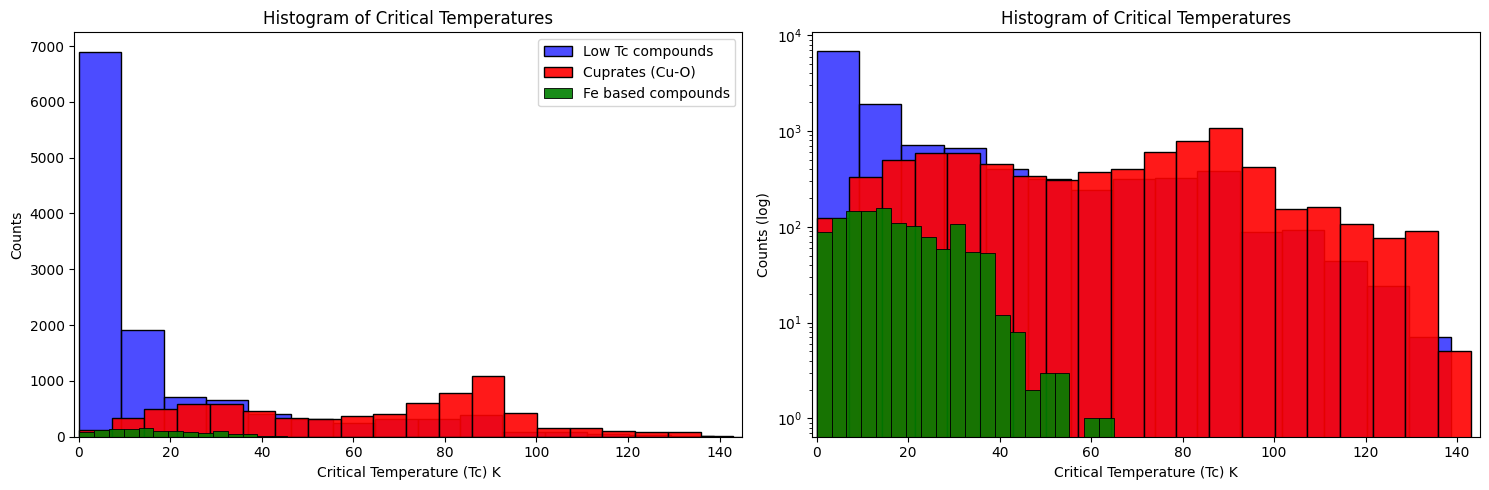

In [383]:
# Get the critical temperatures for consecutive_cu_o_rows and fe_alone_rows
critical_temp_consecutive = consecutive_cu_o_rows['critical_temp']
critical_temp_fe_alone = fe_alone_rows['critical_temp']

# Get the critical temperatures for all other rows (excluding 'Cu-O' consecutive rows and 'Fe' alone rows)
other_critical_temp = formula_train_df[~formula_train_df.index.isin(consecutive_cu_o_rows.index) & ~formula_train_df.index.isin(fe_alone_rows.index)]['critical_temp']

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(other_critical_temp, label='Low Tc compounds', color='blue', alpha=0.7, bins=20, ax=axs[0])
sns.histplot(critical_temp_consecutive, label='Cuprates (Cu-O)', color='red', alpha=0.9, bins=20, ax=axs[0])
sns.histplot(critical_temp_fe_alone, label='Fe based compounds', color='green', alpha=0.9, bins=20, ax=axs[0])
axs[0].set_xlabel('Critical Temperature (Tc) K')
axs[0].set_ylabel('Counts')
axs[0].set_title('Histogram of Critical Temperatures')
axs[0].legend()
axs[0].set_xlim(-1, 145)

sns.histplot(other_critical_temp, label='Low Tc compounds', color='blue', alpha=0.7, bins=20, ax=axs[1])
sns.histplot(critical_temp_consecutive, label='Cuprates (Cu-O)', color='red', alpha=0.9, bins=20, ax=axs[1])
sns.histplot(critical_temp_fe_alone, label='Fe based compounds', color='green', alpha=0.9, bins=20, ax=axs[1])
axs[1].set_xlabel('Critical Temperature (Tc) K')
axs[1].set_ylabel('Counts (log)')
axs[1].set_yscale('log')
axs[1].set_title('Histogram of Critical Temperatures')
axs[1].set_xlim(-1, 145)
#axs[1].legend()
plt.tight_layout()
plt.show()




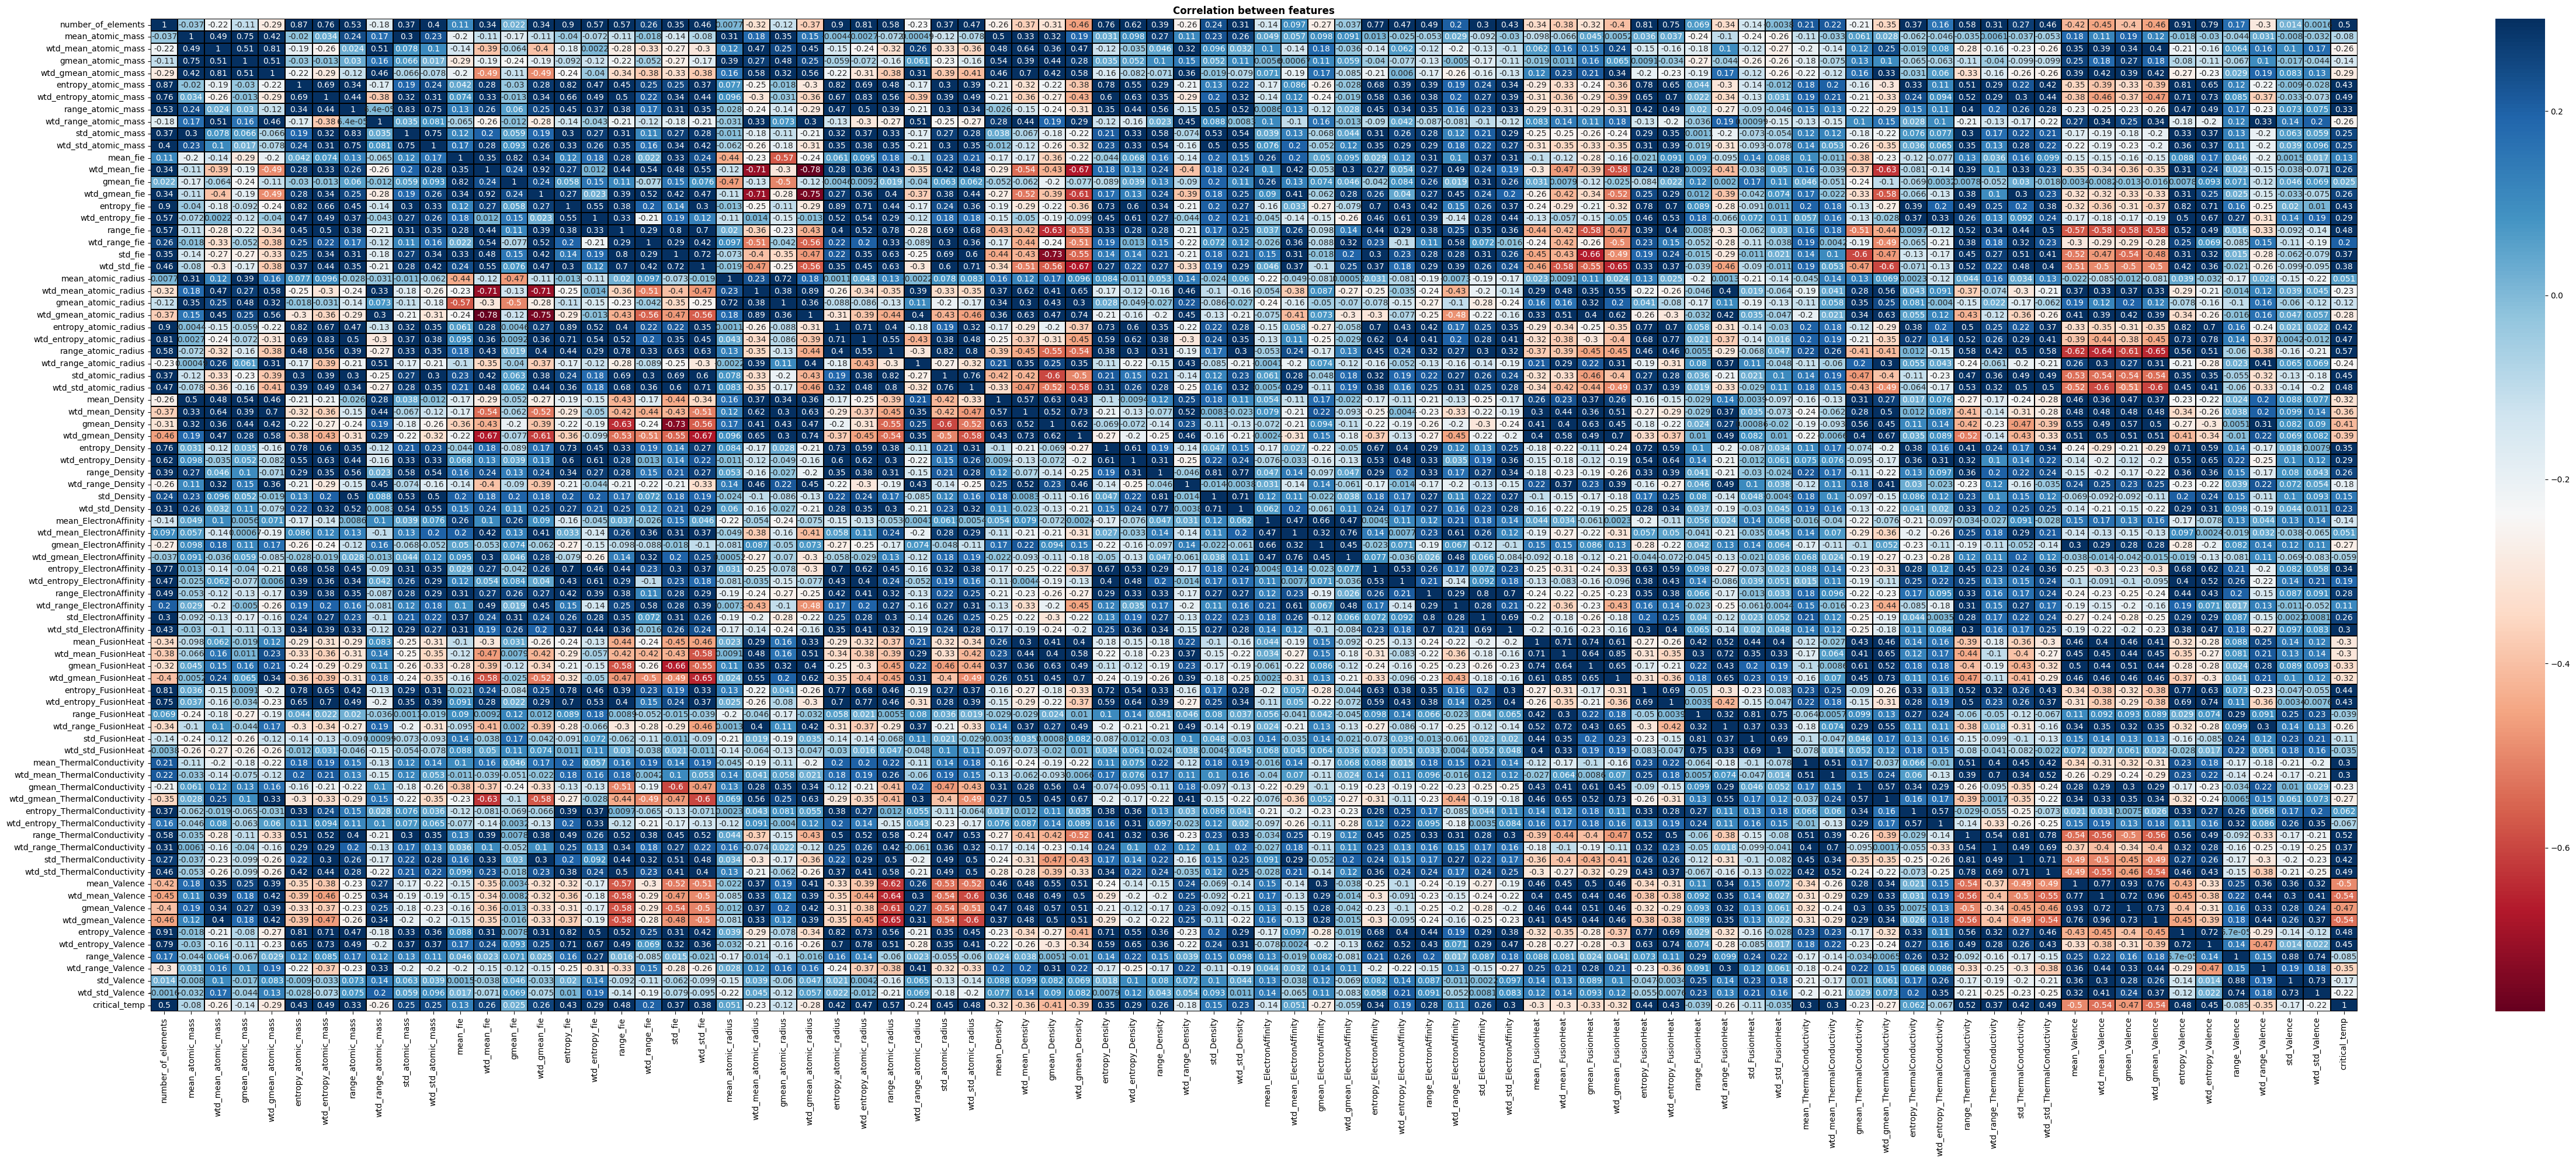

In [405]:
# Correlation heatmap
corr = train_df_cleaned.corr(method='kendall')
plt.figure(figsize=(50, 20))
sns.heatmap(corr, vmax=.3, linewidths=0.05, annot=True, cmap='RdBu', linecolor="black")
plt.title('Correlation between features', weight = 'heavy')
plt.tight_layout()
plt.show()

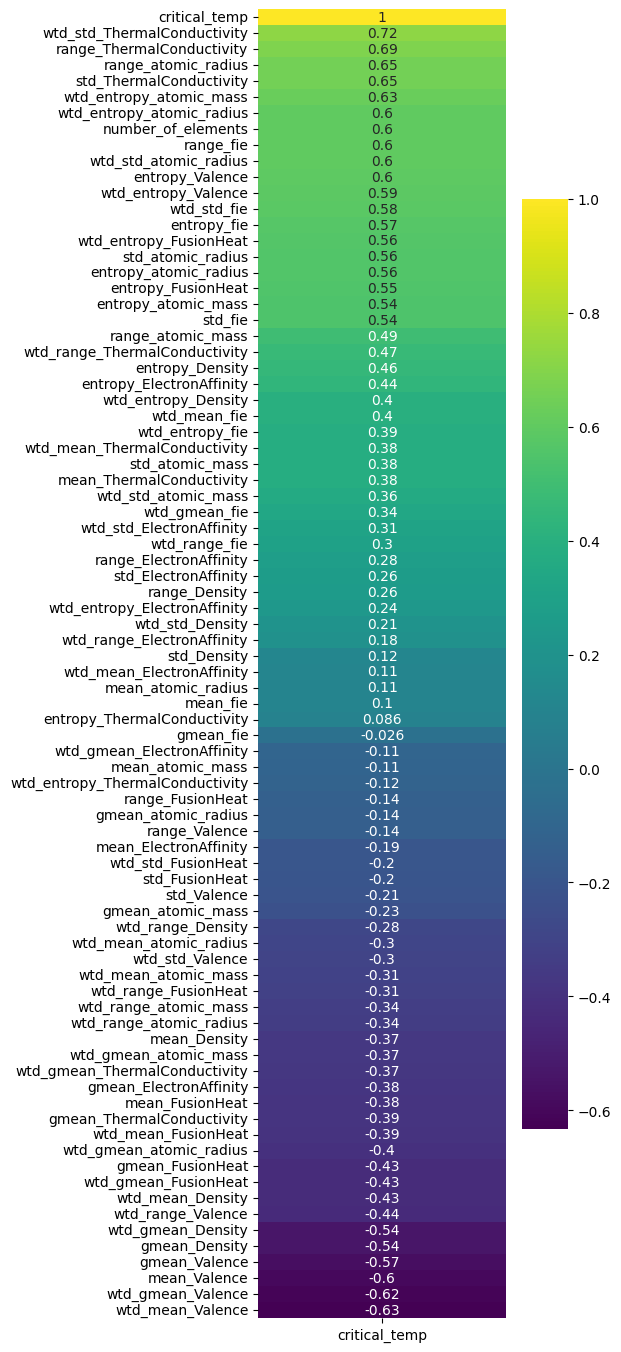

In [406]:
plt.figure(figsize=(4, 17)) 
heatmap = sns.heatmap(train_df_cleaned.corr()[['critical_temp']].sort_values(['critical_temp'], ascending = False), annot = True, cmap = 'viridis')

<a id="3"></a>
# <p style="text-align:center;color:#00FFFF;background-color:#0000FF;font-size:30px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">DATA PRE-PROCCESING </p>

In [388]:
train_df_cleaned.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

In [389]:
train_df_cleaned.shape

(21197, 82)

In [390]:
# splitting into independant and target features

features = train_df_cleaned.iloc[:, :-1]
target =  train_df_cleaned['critical_temp']

In [391]:
features.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  mean_Valence  wtd_mean_Valence  gmean_Valence  \
0        51.968828  ...          2.25          2.257143       2.213364   
1        47.094633  ...          2.00          2.257143       1.888175   
2        51.968828  ...          2.25          2.271429       2.213364   
3        51.968828  ...          2.25          2.264286       2.213364   
4        51.968828  ...          2.25          2.242857       2.213364   

   wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
0           2.219783         1.368922             1.066221              1   
1           2.210679         1.557113             1.047221              2   
2           2.232679         1.368922             1.029175              1   
3           2.226222         1.368922             1.048834              1   
4           2.206963         1.368922             1.096052              1   

   wtd_range_Valence  std_Valence  wtd_std_Valence  
0           1.085714     0.433013         0.437059  
1           1.128571     0.632456         0.468606  
2           1.114286     0.433013         0.444697  
3           1.100000     0.433013         0.440952  
4           1.057143     0.433013         0.428809  

[5 rows x 81 columns]

In [392]:
target

0         29.00
1         26.00
2         19.00
3         22.00
4         23.00
          ...  
21258      2.44
21259    122.10
21260      1.98
21261      1.84
21262     12.80
Name: critical_temp, Length: 21197, dtype: float64

In [393]:
## standardize the dataset

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [394]:
features_scaled = std_scaler.fit_transform(features)

In [395]:
features_scaled

array([[-0.08364344,  0.04723857, -0.45076625, ..., -0.40426287,
        -0.83853006, -0.51994534],
       [ 0.61164674,  0.17491858, -0.431169  , ..., -0.36042021,
        -0.42729972, -0.45076649],
       [-0.08364344,  0.04723857, -0.45009232, ..., -0.37503443,
        -0.83853006, -0.50319673],
       ...,
       [-1.47422379,  0.40883915,  0.67733933, ...,  1.75864152,
        -0.70040923, -0.60120977],
       [-1.47422379,  0.40883915,  0.72176546, ...,  0.74587615,
        -0.70040923, -0.46417144],
       [-0.77893362, -0.00255943,  0.41581499, ...,  0.32644807,
         1.18460389,  1.81092564]])

<a id="3"></a>
# <p style="text-align:center;color:#00FFFF;background-color:#0000FF;font-size:30px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">TRAIN MODEL (BASELINE) </p>

In [396]:
### Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled,target, test_size= 0.3, random_state=40)

In [397]:
print(f'Train dataset shape: {X_train.shape}, {y_train.shape}')
print(f'Test dataset shape: {X_test.shape}, {y_test.shape}')

Train dataset shape: (14837, 81), (14837,)
Test dataset shape: (6360, 81), (6360,)


<a id="section-4"></a>
# 4. Model Training

In [398]:
# writting Function to visualize our models performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def PerformanceCalculator(trueVals, predVals, name):
    plt.plot([0,140], [0,120], color='red')  # Plotting diagonal line
    plt.scatter(trueVals, predVals, color='green', alpha=0.7)  # Plotting the points
    rmse = np.sqrt(mean_squared_error(trueVals, predVals))  # Calculating RMSE
    mae = mean_absolute_error(trueVals, predVals)  # Calculating MAE
    mse = mean_squared_error(trueVals, predVals)  # Calculating MSE
    r2 = r2_score(trueVals, predVals)  # Calculating R2
    plt.title('Performance Metrics for {}'.format(name))
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()
    return rmse, mae, mse, r2


## 1. LINEAR REGRESSION

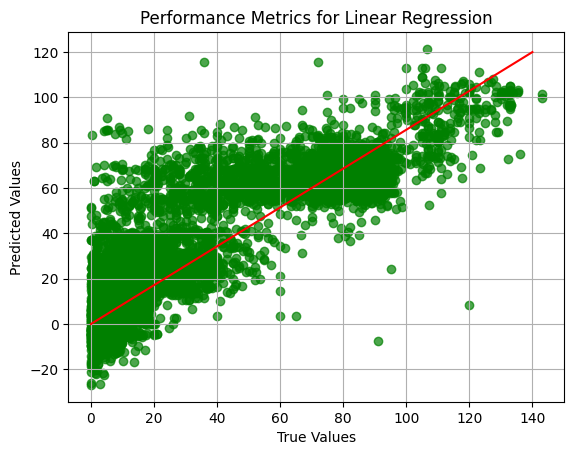

RMSE for Linear Regression  : 17.699502614457362
MAE for Linear Regression   : 13.420281137085311
MSE for Linear Regression   : 313.272392799183
R2 for Linear Regression    : 0.7396327366071298


In [401]:
# lets start our Analysis with linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Linear Regression')
print("RMSE for Linear Regression  :", rmse)
print("MAE for Linear Regression   :", mae)
print("MSE for Linear Regression   :", mse)
print("R2 for Linear Regression    :", r2)

## 2. DECISION TREE

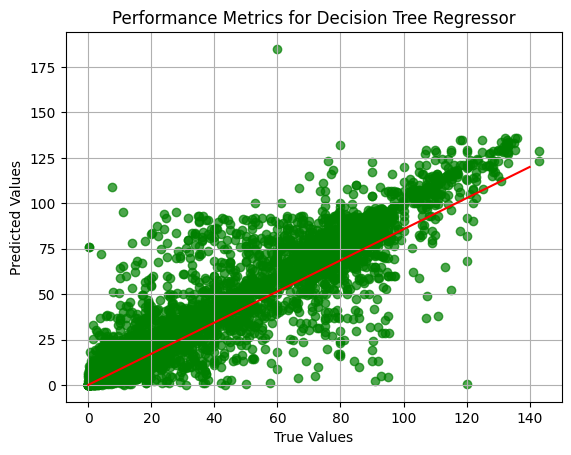

RMSE for Decision Tree Regressor  : 12.253292441349302
MAE for Decision Tree Regressor   : 6.296790736341393
MSE for Decision Tree Regressor   : 150.14317565322793
R2 for Decision Tree Regressor    : 0.8752128541789339


In [402]:
# lets do one better by using a decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)

rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Decision Tree Regressor')
print("RMSE for Decision Tree Regressor  :", rmse)
print("MAE for Decision Tree Regressor   :", mae)
print("MSE for Decision Tree Regressor   :", mse)
print("R2 for Decision Tree Regressor    :", r2)

## 3. GRADIENT BOOST REGRESSOR

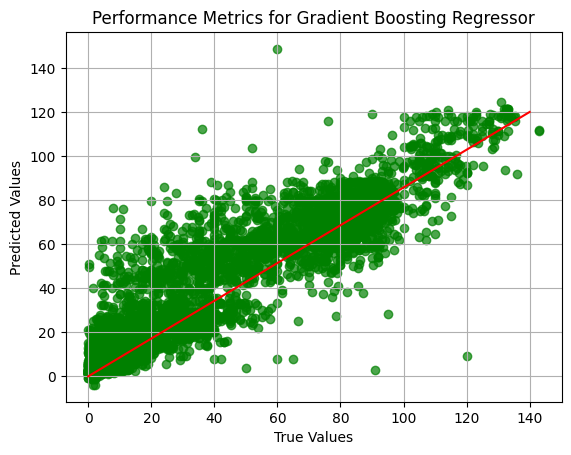

RMSE for Gradient Boosting Regressor  : 12.4835898085198
MAE for Gradient Boosting Regressor   : 8.588629691168011
MSE for Gradient Boosting Regressor   : 155.84001450737944
R2 for Gradient Boosting Regressor    : 0.8704780917915044


In [403]:
# lets Try gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
predictions = gbr.predict(X_test)

rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Gradient Boosting Regressor')
print("RMSE for Gradient Boosting Regressor  :", rmse)
print("MAE for Gradient Boosting Regressor   :", mae)
print("MSE for Gradient Boosting Regressor   :", mse)
print("R2 for Gradient Boosting Regressor    :", r2)

## 4. RANDOM FOREST REGRESSOR

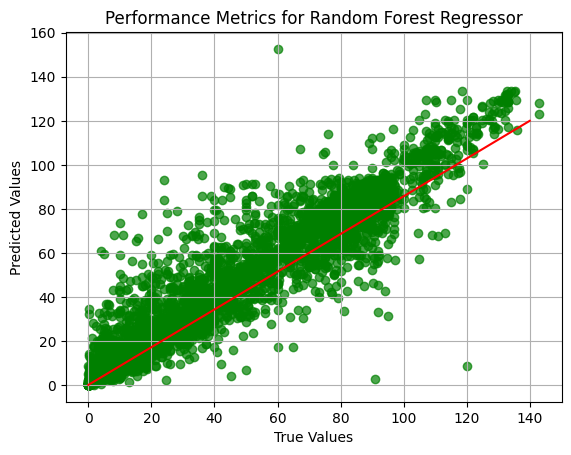

RMSE for Random Forest Regressor  : 9.417994929851908
MAE for Random Forest Regressor   : 5.236780696980039
MSE for Random Forest Regressor   : 88.69862849871623
R2 for Random Forest Regressor    : 0.9262807074617786


In [404]:
# lets try Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Random Forest Regressor')
print("RMSE for Random Forest Regressor  :", rmse)
print("MAE for Random Forest Regressor   :", mae)
print("MSE for Random Forest Regressor   :", mse)
print("R2 for Random Forest Regressor    :", r2)

## 5. K NEAREST NEIGHBOUR REGRESSOR

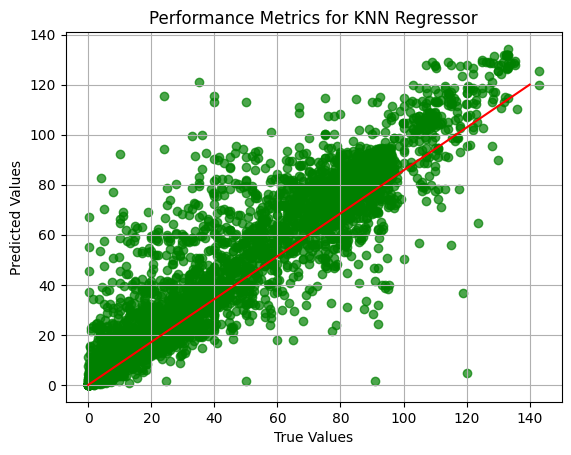

RMSE for KNN Regressor  : 11.198717102452523
MAE for KNN Regressor   : 6.203991906132075
MSE for KNN Regressor   : 125.41126474076262
R2 for KNN Regressor    : 0.8957680646308255


In [142]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate KNN regressor with desired parameters
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)

# Evaluate performance
rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'KNN Regressor')
print("RMSE for KNN Regressor  :", rmse)
print("MAE for KNN Regressor   :", mae)
print("MSE for KNN Regressor   :", mse)
print("R2 for KNN Regressor    :", r2)

## 6. SUPPORT VECTOR REGRESSOR

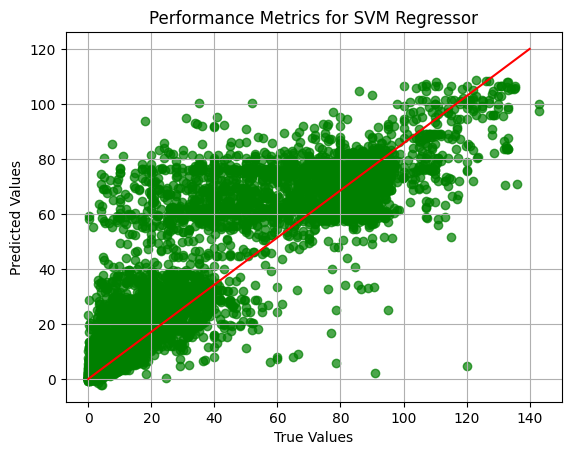

RMSE for SVM Regressor  : 16.388734426271835
MAE for SVM Regressor   : 10.747825263216203
MSE for SVM Regressor   : 268.5906160948676
R2 for SVM Regressor    : 0.7767686994032241


In [143]:
from sklearn.svm import SVR

# Instantiate SVM regressor with desired parameters
svm = SVR(kernel='rbf')  # You can choose different kernels and adjust other parameters as needed

# Fit the model
svm.fit(X_train, y_train)

# Make predictions
predictions = svm.predict(X_test)

# Evaluate performance
rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'SVM Regressor')
print("RMSE for SVM Regressor  :", rmse)
print("MAE for SVM Regressor   :", mae)
print("MSE for SVM Regressor   :", mse)
print("R2 for SVM Regressor    :", r2)


## 7. RIDGE REGRESSOR

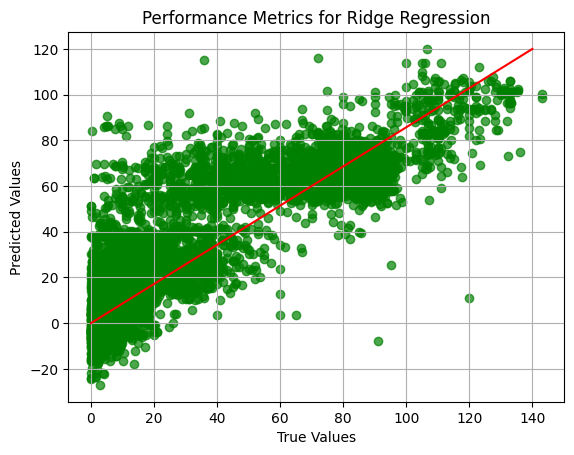

RMSE for Ridge Regression  : 17.708521653287374
MAE for Ridge Regression   : 13.419951830628937
MSE for Ridge Regression   : 313.5917391449478
R2 for Ridge Regression    : 0.7393673211538934


In [144]:
from sklearn.linear_model import Ridge

# Instantiate Ridge regressor with desired parameters
ridge = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Fit the model
ridge.fit(X_train, y_train)

# Make predictions
predictions = ridge.predict(X_test)

# Evaluate performance
rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Ridge Regression')
print("RMSE for Ridge Regression  :", rmse)
print("MAE for Ridge Regression   :", mae)
print("MSE for Ridge Regression   :", mse)
print("R2 for Ridge Regression    :", r2)


## 8. LASSO REGRESSOR

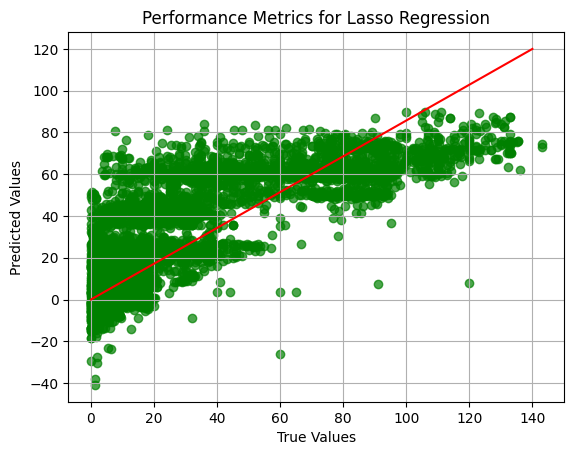

RMSE for Lasso Regression  : 20.436299487778417
MAE for Lasso Regression   : 16.001743511222475
MSE for Lasso Regression   : 417.6423367541724
R2 for Lasso Regression    : 0.6528886847447384


In [145]:
from sklearn.linear_model import Lasso

# Instantiate Lasso regressor with desired parameters
lasso = Lasso(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Fit the model
lasso.fit(X_train, y_train)

# Make predictions
predictions = lasso.predict(X_test)

# Evaluate performance
rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Lasso Regression')
print("RMSE for Lasso Regression  :", rmse)
print("MAE for Lasso Regression   :", mae)
print("MSE for Lasso Regression   :", mse)
print("R2 for Lasso Regression    :", r2)

In [146]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting Regr': GradientBoostingRegressor(),
    'Random Forest Regr': RandomForestRegressor(),
    'KNN Regressor': KNeighborsRegressor(),
    'SVM Regressor': SVR(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Create empty lists to store performance metrics
model_names = []
rmse_values = []
mae_values = []
mse_values = []
r2_values = []

# Function to calculate and append metrics to the lists
def add_metrics_to_lists(model_name, trueVals, predVals):
    global model_names, rmse_values, mae_values, mse_values, r2_values
    rmse = mean_squared_error(trueVals, predVals, squared=False)
    mae = mean_absolute_error(trueVals, predVals)
    mse = mean_squared_error(trueVals, predVals)
    r2 = r2_score(trueVals, predVals)
    model_names.append(model_name)
    rmse_values.append(rmse)
    mae_values.append(mae)
    mse_values.append(mse)
    r2_values.append(r2)

# Assuming you have X_train, y_train, X_test, y_test defined

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    add_metrics_to_lists(model_name, y_test, predictions)

# Create DataFrame from lists
metrics_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'MSE': mse_values,
    'R2': r2_values
})

# Display the DataFrame
metrics_df


Model       RMSE        MAE         MSE        R2
0       Linear Regression  17.699503  13.420281  313.272393  0.739633
1           Decision Tree  12.245950   6.264923  149.963296  0.875362
2  Gradient Boosting Regr  12.482411   8.590315  155.810582  0.870503
3      Random Forest Regr   9.393935   5.241146   88.246009  0.926657
4           KNN Regressor  11.198717   6.203992  125.411265  0.895768
5           SVM Regressor  16.388734  10.747825  268.590616  0.776769
6        Ridge Regression  17.708522  13.419952  313.591739  0.739367
7        Lasso Regression  20.436299  16.001744  417.642337  0.652889

1. **Mean Absolute Error (MAE)** –is the mean of the absolute errors. It is calculated as::

$$MAE = \frac{1}{n}*sum_{i=1}^n|y_i-y_{pred_i}|$$

where $n$ is the number of observations.

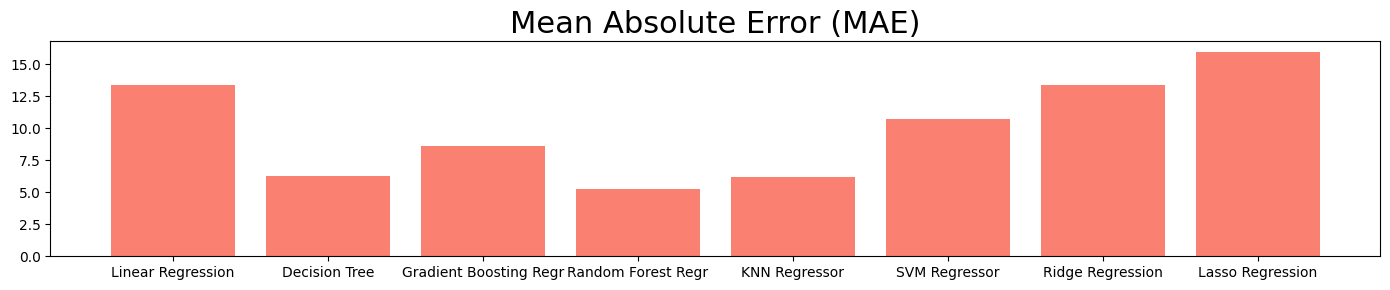

In [147]:
# Create a figure and set its size
plt.figure(figsize=(14, 3))

# Plot MAE
plt.bar(metrics_df['Model'], metrics_df['MAE'], color='salmon')
plt.title('Mean Absolute Error (MAE)', size= 22)
plt.xticks(rotation=0, ha='center', wrap=True)
plt.tight_layout()

==================================================================================================================================================================================================
==================================================================================================================================================================================================

2. **Mean Squared Error (MSE)** – is the mean of the squared errors and is calculated as: $$MSE = \frac{1}{n}*sum_{i=1}^n|y_i-y_{pred_i}|^2$$
where $n$ is the number of observations.

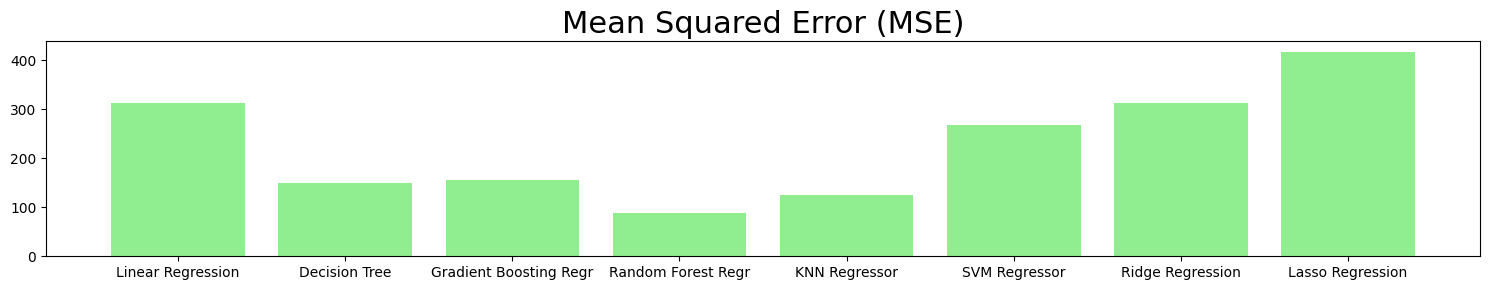

In [148]:
# Create a figure and set its size
plt.figure(figsize=(15, 3))
# Plot MSE

plt.bar(metrics_df['Model'], metrics_df['MSE'], color='lightgreen')
plt.title('Mean Squared Error (MSE)', size= 22)
plt.xticks(rotation=0, ha='center', wrap=True)
plt.tight_layout()

==================================================================================================================================================================================================
==================================================================================================================================================================================================


3. **Coefficient determination $R^2$**
$$R^2 = 1 - \frac{\sum_{i=1}^n(y_{pred_i}-y_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$$
where $n$ is the number of observations, $y_i$ are the actual values of $y$ (i.e., the correct answers) for each observation, $y_{pred_i}$ are the values predicted by the model, and $y_{mean}$ is the mean of all the actual values $y_i$.


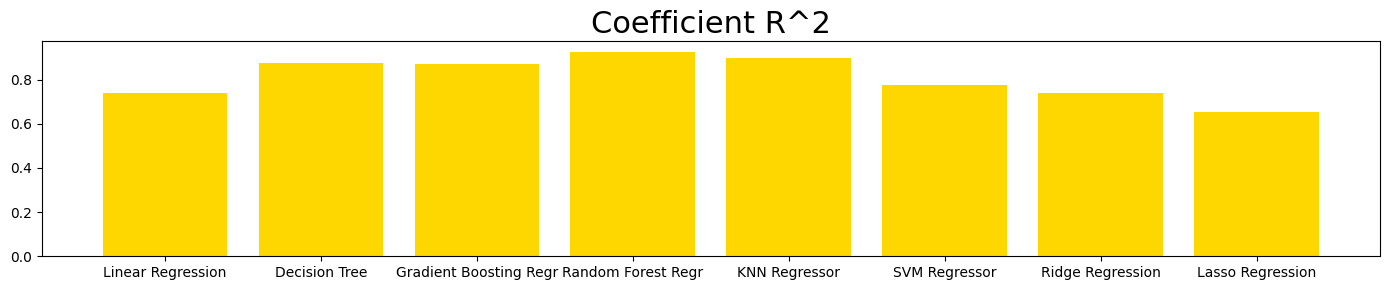

In [149]:
# Create a figure and set its size
plt.figure(figsize=(14, 3))
plt.bar(metrics_df['Model'], metrics_df['R2'], color='gold')
plt.title('Coefficient R^2', size= 22)
plt.xticks(rotation=0, ha='center', wrap=True)
plt.tight_layout()

# Show the plot
plt.show()

==================================================================================================================================================================================================
==================================================================================================================================================================================================

4. **Root Mean Squared Error (RMSE)** –is the root mean of the squared errors and is calculated as: $$RMSE  =  (MSE)^1/2 $$

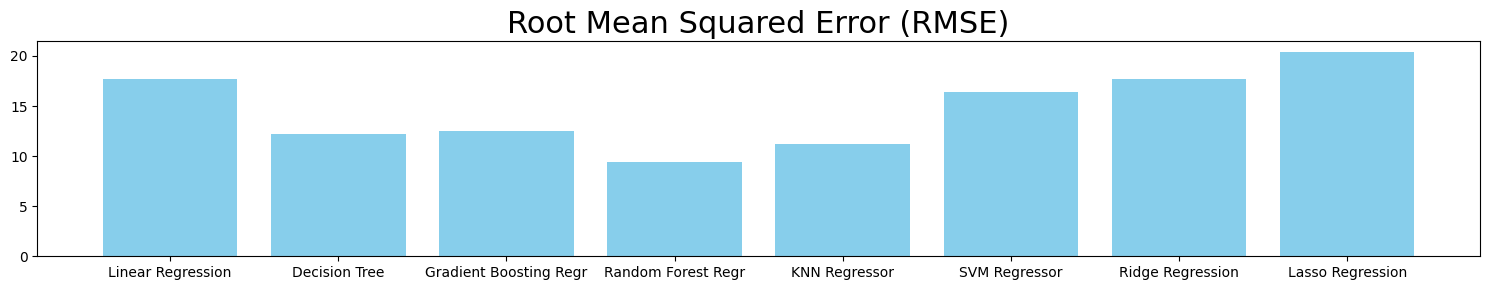

In [150]:
# Create a figure and set its size
plt.figure(figsize=(15, 3))

# Plot RMSE
plt.bar(metrics_df['Model'], metrics_df['RMSE'], color='skyblue')
plt.title('Root Mean Squared Error (RMSE)', size= 22)
plt.xticks(rotation=0, ha='center', wrap=True)
plt.tight_layout()
plt.show()

<a id="section-4.10"></a>
## 4.10 Hyperparameter Tuning for Random Forest

In [151]:
n_estimators = [100, 200, 500]
max_depths = [30, 50, 70]
min_samples_leafs = [2, 5, 10]
test_results = []

for estimator in n_estimators:
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs: 
            rf = RandomForestRegressor(n_estimators=estimator, max_depth=max_depth, min_samples_leaf=min_samples_leaf, n_jobs=-1, random_state=42)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            
            # Calculating evaluation metrics
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            
            # Appending results
            test_results.append((estimator, max_depth, min_samples_leaf, r2, mse, mae, rmse))
            
            print("Number of estimators:", estimator, "Max depth:", max_depth, "Min leafs:", min_samples_leaf, "R2 Score:", r2, "MSE:", mse, "MAE:", mae, "RMSE:", rmse)



Number of estimators: 100 Max depth: 30 Min leafs: 2 R2 Score: 0.9265761011634069 MSE: 88.34321249702293 MAE: 5.279557623144108 RMSE: 9.399107005296989
Number of estimators: 100 Max depth: 30 Min leafs: 5 R2 Score: 0.9226681398755981 MSE: 93.0452490266735 MAE: 5.52284462268698 RMSE: 9.645996528439843
Number of estimators: 100 Max depth: 30 Min leafs: 10 R2 Score: 0.9152557017791371 MSE: 101.96385188286412 MAE: 5.9101951323251924 RMSE: 10.097715181310281
Number of estimators: 100 Max depth: 50 Min leafs: 2 R2 Score: 0.9268475392225742 MSE: 88.01661978646466 MAE: 5.273502109128118 RMSE: 9.381717315420705
Number of estimators: 100 Max depth: 50 Min leafs: 5 R2 Score: 0.9226561156218271 MSE: 93.0597165396065 MAE: 5.52300894039928 RMSE: 9.646746422478747
Number of estimators: 100 Max depth: 50 Min leafs: 10 R2 Score: 0.9152557017791371 MSE: 101.96385188286413 MAE: 5.9101951323251924 RMSE: 10.097715181310281
Number of estimators: 100 Max depth: 70 Min leafs: 2 R2 Score: 0.9268475392225742 MS

In [152]:
# Define column names
columns = ['Estimator', 'Max Depth', 'Min Samples Leaf', 'R2 Score', 'MSE', 'MAE', 'RMSE']

# Convert list to DataFrame
test_results_df = pd.DataFrame(test_results, columns=columns)

# Print the DataFrame
test_results_df


Estimator  Max Depth  Min Samples Leaf  R2 Score         MSE       MAE  \
0         100         30                 2  0.926576   88.343212  5.279558   
1         100         30                 5  0.922668   93.045249  5.522845   
2         100         30                10  0.915256  101.963852  5.910195   
3         100         50                 2  0.926848   88.016620  5.273502   
4         100         50                 5  0.922656   93.059717  5.523009   
5         100         50                10  0.915256  101.963852  5.910195   
6         100         70                 2  0.926848   88.016620  5.273502   
7         100         70                 5  0.922656   93.059717  5.523009   
8         100         70                10  0.915256  101.963852  5.910195   
9         200         30                 2  0.927132   87.674448  5.256887   
10        200         30                 5  0.923066   92.566064  5.498778   
11        200         30                10  0.915765  101.351601  5.894132   
12        200         50                 2  0.927371   87.386366  5.250645   
13        200         50                 5  0.923050   92.585481  5.498911   
14        200         50                10  0.915765  101.351601  5.894132   
15        200         70                 2  0.927371   87.386366  5.250645   
16        200         70                 5  0.923050   92.585481  5.498911   
17        200         70                10  0.915765  101.351601  5.894132   
18        500         30                 2  0.927367   87.391881  5.246347   
19        500         30                 5  0.923230   92.369050  5.491295   
20        500         30                10  0.915879  101.214012  5.890047   
21        500         50                 2  0.927465   87.274084  5.242907   
22        500         50                 5  0.923221   92.379469  5.491458   
23        500         50                10  0.915878  101.214863  5.890089   
24        500         70                 2  0.927465   87.274084  5.242907   
25        500         70                 5  0.923221   92.379469  5.491458   
26        500         70                10  0.915878  101.214863  5.890089   

         RMSE  
0    9.399107  
1    9.645997  
2   10.097715  
3    9.381717  
4    9.646746  
5   10.097715  
6    9.381717  
7    9.646746  
8   10.097715  
9    9.363463  
10   9.621126  
11  10.067353  
12   9.348068  
13   9.622135  
14  10.067353  
15   9.348068  
16   9.622135  
17  10.067353  
18   9.348362  
19   9.610882  
20  10.060517  
21   9.342060  
22   9.611424  
23  10.060560  
24   9.342060  
25   9.611424  
26  10.060560

# True values, Predicted values, errors for Random Forest

In [153]:
ylab = y_test  # True target values
predVals = rf.predict(X_test)  # Predicted target values using Random Forest model

# Compute absolute error between true and predicted values
diff = abs(ylab - predVals)

# Create a dictionary to store true values, predicted values, and absolute error
ansFrame = {
    'True Tc': ylab,
    'Predicted Tc': predVals,
    'Absolute error': diff
}

# Create a pandas DataFrame from the dictionary
ansFrame = pd.DataFrame(ansFrame)

# Display the first 50 rows of the DataFrame
ansFrame


True Tc  Predicted Tc  Absolute error
17168    27.11     25.168792        1.941208
9219      3.00      9.221731        6.221731
12099     5.30      5.537241        0.237241
11683     1.50      1.716148        0.216148
11733     3.70      4.913304        1.213304
...        ...           ...             ...
17935    21.80     22.567613        0.767613
9659     32.20     33.955295        1.755295
3480     36.00     46.323595       10.323595
6111     21.00     36.301101       15.301101
17562     1.82      3.536460        1.716460

[6360 rows x 3 columns]

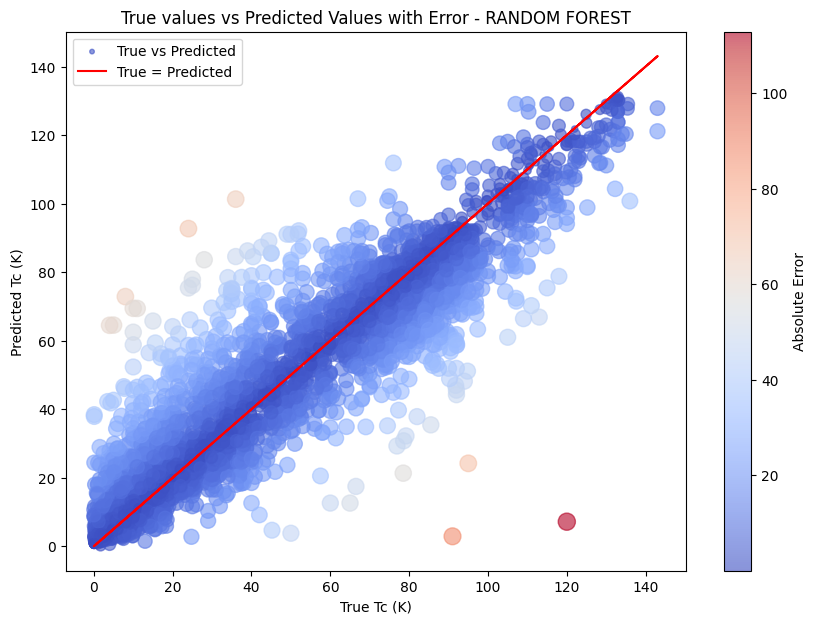

In [154]:
plt.figure(figsize=(10, 7))
# Calculate marker sizes based on absolute error
marker_sizes = 50 * (1 + np.log10(ansFrame['Absolute error']))

# Scatter plot of true vs predicted values with marker sizes based on error
plt.scatter(ansFrame['True Tc'], ansFrame['Predicted Tc'], s=marker_sizes, c=ansFrame['Absolute error'], cmap='coolwarm', alpha=0.6, label='True vs Predicted')

# Plot the line where true values equal predicted values for reference
plt.plot(ansFrame['True Tc'], ansFrame['True Tc'], color='red', label='True = Predicted')

plt.xlabel('True Tc (K)')
plt.ylabel('Predicted Tc (K)')
plt.title('True values vs Predicted Values with Error - RANDOM FOREST')
plt.colorbar(label='Absolute Error')
plt.legend()
plt.show()

<a id="section-5.1"></a>
## 5.1 Conclusion & Future Scope

We tried several methods-
   * Linear Regression
   * Decision Tree Regressor
   * Gradient Boosting Regressor
   * Random Forest Regressor
   * K Nearest Neighbors Regressor
   * SVM Regressor
   * Ridge Regression
   * Lasso Regression
   


* Out of all the regression models the best R2-score was 0.7 using Random Forest Regressor.
* Best R2-score from the Random Forest Regressor was about 0.87 having max_depth:50 and min_leafs:5
* For the Random Forest Regressor the best R2-score of about 0.907 on the test set was obtained n_estimators: 400

### Future Scope:
Neural Networks can be implemented to obtain better accuracy